### 오늘 강의 내용
- 어제한 다중공선성 설명 한번 더(간단히)
  - 최적화된 x 변수 찾기( 회귀분석: 오차값 최적화, 잔차 그래피, MSE. RMSE, AIC )
    - 방법 1 ) 다 넣고 한 개씩 변수를 제거하면서 최적화를 확인 (후진 소거법)
    - 방법 2 ) 한 개씩 추가하면서 최적화를 확인 ( 전진선택법 )
- 캐글의 샘플코드 실행
- 규제 ( 라쏘, 리지, 엘라스틱의 이해)
- 배틀크라운드 회귀 분석 (캐글 실행)
- 데이콘에서 통계분석 진행

- 머신러닝과 딥러닝, 최대한 사람이 관여 하지 않는다.
- 딥러닝(비정형), 수많은 w값을 찾아내느것 자체가 무모한 일
- 머신러닝(정형, 비정형)
- ReLU ( 공부하기 )
- 정형이건 비정형이건 기본적으로 데이터 양에 따라 해야 할 일이 달라진다
- 모든 자료의 근본은 w 값을 줄이는것,( 예측 값과 실제 값의 차이를 줄인다,)
-  w 값을 줄인다는것은 회귀계수를 골고루 분포하게 하는것, 어딘가에 집중되지 않게
- 이상치를 확인하는 방법 : 데이터를 정규성을 가지고 있는지 확인
- 0.05 미만인 경우 좋은 데이터
- 데이터 값이 작을수록 (~31개) 변수값에 휘둘릴수 있기 때문에 극단값을 지우고
- 필수적으로 이상값을 확인해야 한다.
- boxplot이 어떤 공식으로 만들어지냐?? : 박스의 밑에는 25% 위쪽은 75%
  - 박스가 아래로 내려온것은 아래쪽 데이터가 많은것,
  - 이상치가 전체 데이터에 영향을 미치는지가 중요.
  - 요즘의 빅데이터에서는 이상치도 의미 없고 P-value도 의미 없음
  - 왜그런지 다시 생각해보기
  

In [1]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta


# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [31]:
# Local file path. Please change the file path accordingly


file = 'CarPrice_Assignment.csv'
file1 = 'Data Dictionary - carprices.xlsx'

In [32]:
# Reading the automobile consulting company file on which analysis needs to be done

df_auto = pd.read_csv(file)

df_auto.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


In [33]:
# Reading the data dictionary file

df_stru = pd.read_excel(file1)
df_stru.head(2)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,DATA DICTONARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# shape of the data
df_auto.shape #200개의 데이터 이기 때문에 데이터가 민감하다.

(205, 26)

In [35]:
# information of the data
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [36]:
# description of the data
df_auto.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000
mean,103.0000,0.8341,98.7566,174.0493,65.9078,53.7249,2555.5659,126.9073,3.3298,3.2554,10.1425,104.1171,5125.1220,25.2195,30.7512,13276.7106
std,59.3226,1.2453,6.0218,12.3373,2.1452,2.4435,520.6802,41.6427,0.2708,0.3136,3.9720,39.5442,476.9856,6.5421,6.8864,7988.8523
min,1.0000,-2.0000,86.6000,141.1000,60.3000,47.8000,1488.0000,61.0000,2.5400,2.0700,7.0000,48.0000,4150.0000,13.0000,16.0000,5118.0000
25%,52.0000,0.0000,94.5000,166.3000,64.1000,52.0000,2145.0000,97.0000,3.1500,3.1100,8.6000,70.0000,4800.0000,19.0000,25.0000,7788.0000
50%,103.0000,1.0000,97.0000,173.2000,65.5000,54.1000,2414.0000,120.0000,3.3100,3.2900,9.0000,95.0000,5200.0000,24.0000,30.0000,10295.0000
75%,154.0000,2.0000,102.4000,183.1000,66.9000,55.5000,2935.0000,141.0000,3.5800,3.4100,9.4000,116.0000,5500.0000,30.0000,34.0000,16503.0000
max,205.0000,3.0000,120.9000,208.1000,72.3000,59.8000,4066.0000,326.0000,3.9400,4.1700,23.0000,288.0000,6600.0000,49.0000,54.0000,45400.0000


## Step 2: Cleaning the Data

In [37]:
# dropping car_ID based on business knowledge

df_auto = df_auto.drop('car_ID',axis=1)

In [38]:
# Calculating the Missing Values % contribution in DF

df_null = df_auto.isna().mean().round(4) * 100

df_null.sort_values(ascending=False).head()

symboling    0.0000
enginetype   0.0000
highwaympg   0.0000
citympg      0.0000
peakrpm      0.0000
dtype: float64

In [53]:
# Datatypes
df_auto.dtypes

symboling           int64  
CarName             object 
fueltype            object 
aspiration          object 
doornumber          object 
carbody             object 
drivewheel          object 
enginelocation      object 
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight          int64  
enginetype          object 
cylindernumber      object 
enginesize          int64  
fuelsystem          object 
boreratio           float64
stroke              float64
compressionratio    float64
horsepower          int64  
peakrpm             int64  
citympg             int64  
highwaympg          int64  
price               float64
dtype: object

(205, 25)

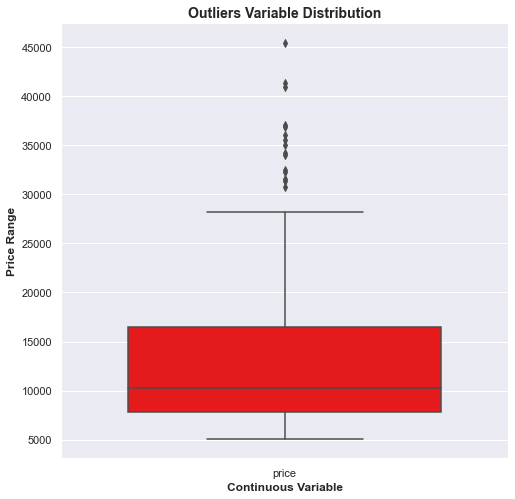

In [40]:
# Outlier Analysis of target variable with maximum amount of Inconsistency

outliers = ['price']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df_auto[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
df_auto.shape

In [57]:
df_auto['CarName']

0      alfa-romero giulia      
1      alfa-romero stelvio     
2      alfa-romero Quadrifoglio
3      audi 100 ls             
4      audi 100ls              
          ...                  
200    volvo 145e (sw)         
201    volvo 144ea             
202    volvo 244dl             
203    volvo 246               
204    volvo 264gl             
Name: CarName, Length: 205, dtype: object

#### Insights:

- There are some price ranges above 36000 which can be termed as outliers but lets not remove it rather we will use standarization scaling.

In [58]:
# Extracting Car Company from the CarName as per direction in Problem 

#df_auto['CarName'].columns()

df_auto['CarName'] = df_auto['CarName'].str.split(' ', expand=True, n =204)

ValueError: Columns must be same length as key

In [42]:
# Unique Car company

df_auto['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [16]:
# Renaming the typo errors in Car Company names
df_auto['CarName'] = df_auto['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [17]:
# changing the datatype of symboling as it is categorical variable as per dictionary file

df_auto['symboling'] = df_auto['symboling'].astype(str)

In [18]:
# checking for duplicates

df_auto.loc[df_auto.duplicated()]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [19]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = df_auto.select_dtypes(include=['object']).columns
num_col = df_auto.select_dtypes(exclude=['object']).columns
df_cat = df_auto[cat_col]
df_num = df_auto[num_col]

Text(0, 0.5, 'Count of Cars')

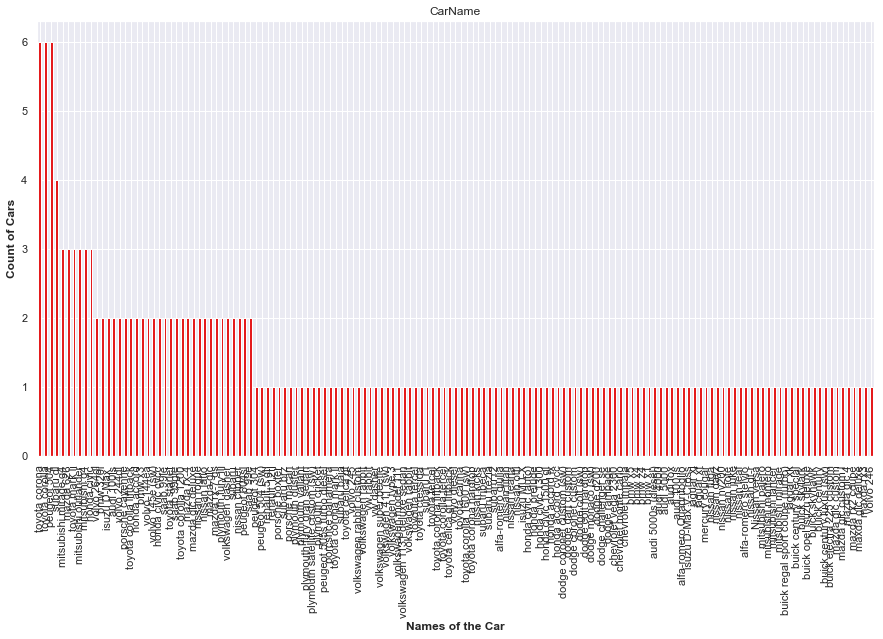

In [20]:
# Visualizing the different car names available

plt.rcParams['figure.figsize'] = [15,8]
ax=df_auto['CarName'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('CarName')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

## mushroom

- 버섯 자료는 모두 문자형이라 분류가 어렵다
- 라쏘 = 불필요한 x 값 회귀계수에 0, 더미 변수가 많은 데이터에 사용, 더미 없이 레벨인코딩만 하고 작업함
- 리지 = 너무 큰 회귀계수값 줄여서 영향력이 많은 x 변수 값의 영향력을 줄이는것
- ex) 시도별 분석을 하고 싶은데,

- 라쏘가 릿지보다 값이 크기 때문에 , L1이 라쏘, L2가 릿지,
- SSE + (라쏘(L1), 릿지(L2))

#### norm

- 선형대수학에서 놈은 벡터의 크기(magnitude) 또는 길이(length)를 측정하는 방법을 의미합니다. 선형대수학이 낯선 분들이 처음에 헷갈려하시는 것이 있는데 차원(dimension)과 길이(length)는 분명히 다릅니다. 다음과 같은 벡터가 있다고 가정해보겠습니다.


- L1 norm L1 Norm은 p가 1인 norm : 맨하탄 거리, 택시 norm, 크기를 뺀 후 절댓값

- L2 Norm L2 Norm은 p가 2인 Norm입니다. 유클리드 norm이라고 불리기도 합니다. 작선값

- 유클리드 norm 은 자료간의 벡터거리 계산에 쓰인다

- L1 규제는 영향력이 적은것, L2

- 릿지 ridge=Ridge(alpha=10),  alpha값이 커지면 커질수록 쌔진다.

- alpha값 변경 loop가 있지만, 그리드서치가 있기 때문에 사용 권장 하지 않음



### [랏쏘모델(L1규제)]

- L2규제에 비해 회귀계수가 급격하게 0으로 되는 경향이 있음.
- L1규제는 적절한 피처값만 사용하는 것을 권장함 -랏쏘모델의 특징: 서로 상관관계가 높은 피처들의 경우 이들중에서 중요한 피처만 선택하고나머지 피처는 회귀계수를 0으로 만드는 성향이 강함. 이러한 이유로 알파값에 따른 회귀계수의 값이 급격하게 변동할 수 있음

### [엘라스틱 회귀(L1+L2)

- 엘라스틱 회귀는 이를 완화하기 위해 L2규제를 랏쏘모델에 추가한것임.
- 엘라스틱 회귀의 단점은 L1과 L2규제가 결합되어 수행시간이 상대적으로 나옴